# Random Forest Algorithm
Prajjwal Vijaywargiya - 2017B3A70954H  
Siddhi Mahesh Burse - 2017B3A70972H  
Parth Krishna Sharma - 2017B3A70907H

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
train_file = pd.read_csv('D:/BITS/DL/Assignments/Assignment1/mnist_train.csv')
test_file = pd.read_csv('D:/BITS/DL/Assignments/Assignment1/mnist_test.csv')

In [3]:
X_train,y_train = train_file.iloc[:,1:].values, train_file.iloc[:,0].values
x_test,y_test = test_file.iloc[:,1:].values,test_file.iloc[:,0].values

Label: 1


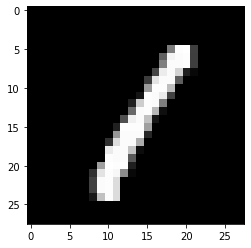

In [4]:
index = 3
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [5]:
clf = RandomForestClassifier(n_estimators=101,criterion='entropy',max_features = 'sqrt',verbose=2)
clf.fit(X_train,y_train)

building tree 1 of 101


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 101
building tree 3 of 101
building tree 4 of 101
building tree 5 of 101
building tree 6 of 101
building tree 7 of 101
building tree 8 of 101
building tree 9 of 101
building tree 10 of 101
building tree 11 of 101
building tree 12 of 101
building tree 13 of 101
building tree 14 of 101
building tree 15 of 101
building tree 16 of 101
building tree 17 of 101
building tree 18 of 101
building tree 19 of 101
building tree 20 of 101
building tree 21 of 101
building tree 22 of 101
building tree 23 of 101
building tree 24 of 101
building tree 25 of 101
building tree 26 of 101
building tree 27 of 101
building tree 28 of 101
building tree 29 of 101
building tree 30 of 101
building tree 31 of 101
building tree 32 of 101
building tree 33 of 101
building tree 34 of 101
building tree 35 of 101
building tree 36 of 101
building tree 37 of 101
building tree 38 of 101
building tree 39 of 101
building tree 40 of 101
building tree 41 of 101
building tree 42 of 101
building tree 43 of 101


[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [6]:
prediction_test = clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    0.5s finished


In [7]:
acc = accuracy_score(y_test,prediction_test)
acc

0.9702

In [15]:
n_est=101

Text(0.5, 1.0, 'Feature Importances learnt via Random Forest Classifier\ncriterion: Entropy, n_estimators=101\nTest Accuracy=97.02%')

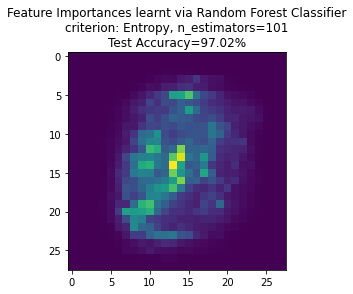

In [16]:
ft = clf.feature_importances_
ft = ft*25500
plt.imshow(ft.reshape((28,28)))
plt.title("Feature Importances learnt via Random Forest Classifier\ncriterion: Entropy, n_estimators={}\nTest Accuracy={}%".format(n_est,acc*100))

Text(0.5, 1.0, 'Confusion Matrix for Random Forest\nModel Accuracy=97.02%')

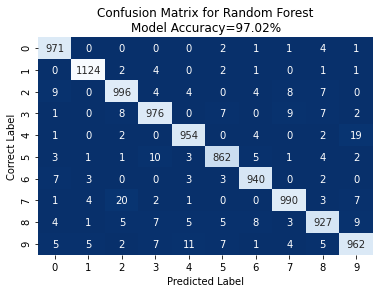

In [17]:
sns.heatmap(confusion_matrix(y_test,prediction_test),cmap='Blues_r',fmt='',annot=True,cbar=False)
plt.ylabel("Correct Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix for Random Forest\nModel Accuracy={}%".format(acc*100))

In [18]:
print("Classification Report for Random Forest:\n{}".format(classification_report(y_test,prediction_test)))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [19]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

In [20]:
indices = np.argsort(ft)[::-1]

In [22]:
print("Feature Ranking:")
for f in range(X_train.shape[1]):
    print("{} Feature {} : {}".format(f+1,indices[f],ft[indices[f]]))

Feature Ranking:
1 Feature 405 : 330.3702484879864
2 Feature 378 : 312.66413895012283
3 Feature 350 : 266.37576752742723
4 Feature 462 : 265.6963726835312
5 Feature 433 : 257.5013562405533
6 Feature 377 : 245.5067173075428
7 Feature 155 : 236.29958758566866
8 Feature 489 : 233.48333481858472
9 Feature 542 : 230.99166520055937
10 Feature 346 : 225.7476694007231
11 Feature 541 : 213.92140366676512
12 Feature 402 : 210.7769095360043
13 Feature 570 : 208.00121517259066
14 Feature 347 : 205.86535224851144
15 Feature 401 : 202.28471663680398
16 Feature 437 : 194.76621327909032
17 Feature 406 : 192.7661987002504
18 Feature 154 : 191.41597113681408
19 Feature 569 : 189.41219708560692
20 Feature 567 : 189.04040531951122
21 Feature 153 : 188.017059903061
22 Feature 211 : 184.09057107125395
23 Feature 461 : 182.24952183716093
24 Feature 568 : 181.38964749316713
25 Feature 488 : 177.6952354138464
26 Feature 381 : 174.96293090519677
27 Feature 434 : 173.15112680460388
28 Feature 487 : 168.630062932